In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import pearsonr
from scipy import stats
import warnings
from scipy.signal import argrelextrema
#from cydets.algorithm import detect_cycles
import os 
import openpyxl

import statsmodels.api as sm

In [7]:
curr_path = os.getcwd()
input_path = os.path.join(curr_path,'data.xlsx')

data = pd.read_excel(
    input_path
)


## Correlation Matrix

In [8]:
data.corr(method='pearson')

,SP500-EPS-Index,ActivityIndex,NewOrders,Shipments,UnfilledOrders,DeliveryTime,Inventories,PricesPaid,Employment,AverageWorkweek,GS10,M2,GovernmentBudgetBalance
SP500-EPS-Index,1.000000,0.041261,0.042968,-0.037039,0.236671,0.247301,0.310077,-0.111600,0.395995,0.265740,-0.749587,0.926845,-0.446329
ActivityIndex,0.041261,1.000000,0.924221,0.831975,0.808639,0.671113,0.402983,0.097806,0.654795,0.769869,-0.034523,0.008045,0.086571
NewOrders,0.042968,0.924221,1.000000,0.871166,0.802633,0.654233,0.413616,0.083576,0.659970,0.779266,-0.013886,0.002910,0.130892
Shipments,-0.037039,0.831975,0.871166,1.000000,0.698524,0.645812,0.394694,0.276272,0.683371,0.787216,0.096588,-0.101177,0.182315
UnfilledOrders,0.236671,0.808639,0.802633,0.698524,1.000000,0.780420,0.507699,0.127874,0.716610,0.765608,-0.255463,0.213965,-0.042737
DeliveryTime,0.247301,0.671113,0.654233,0.645812,0.780420,1.000000,0.513199,0.301017,0.706346,0.761965,-0.152862,0.219374,-0.073933
Inventories,0.310077,0.402983,0.413616,0.394694,0.507699,0.513199,1.000000,0.320777,0.601585,0.518519,-0.243650,0.225233,-0.055125
PricesPaid,-0.111600,0.097806,0.083576,0.276272,0.127874,0.301017,0.320777,1.000000,0.396293,0.337451,0.277448,-0.211730,0.144350
Employment,0.395995,0.654795,0.659970,0.683371,0.716610,0.706346,0.601585,0.396293,1.000000,0.822569,-0.261241,0.270187,0.006697
AverageWorkweek,0.265740,0.769869,0.779266,0.787216,0.765608,0.761965,0.518519,0.337451,0.822569,1.000000,-0.153193,0.199864,0.031517


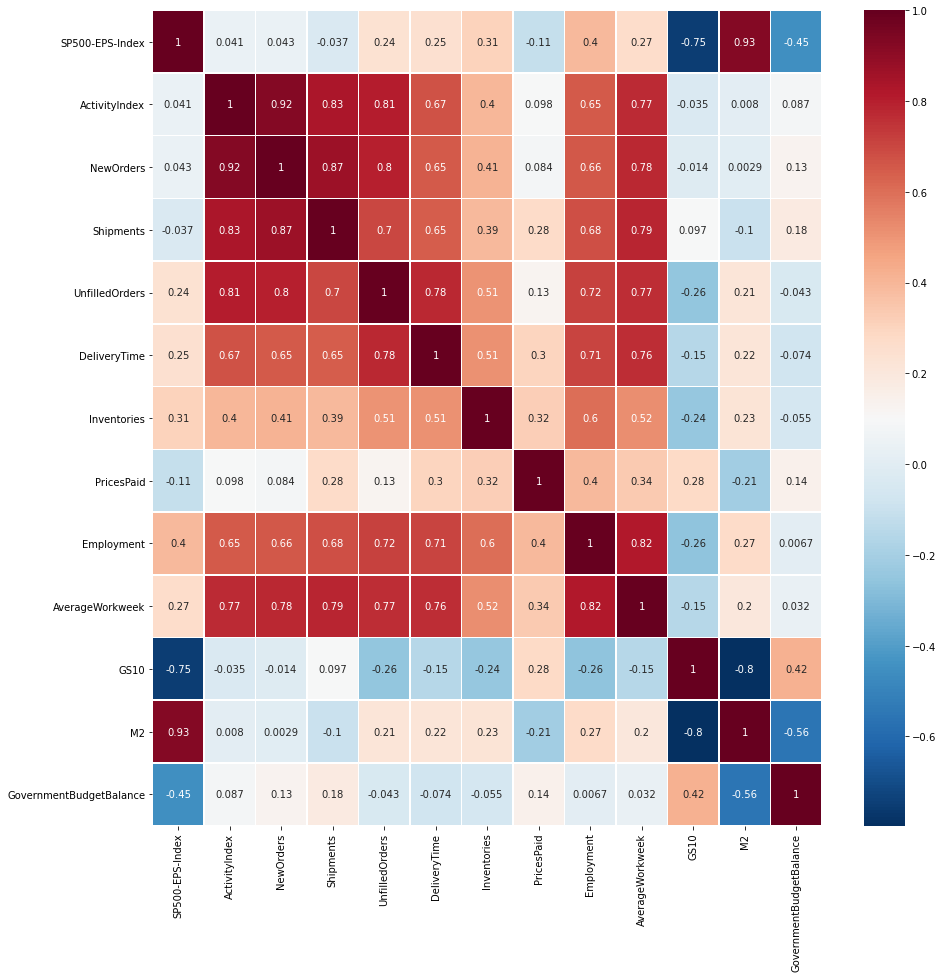

In [9]:
# use all features
# most of the correlations are okay, note that neural network does not 
# need many assumptions on predictors
plt.figure(figsize = (15,15))
pearsoncorr = data.corr(method='pearson')
sns.heatmap(pearsoncorr,
xticklabels=pearsoncorr.columns,
yticklabels=pearsoncorr.columns,
cmap='RdBu_r',
annot=True,
linewidth=0.5)
plt.show()

## One-Hot Encoding (Expanding = 1, Contracting = 0)

In [61]:
# find peak and bottom indices
ilocs_min = argrelextrema(new_data['SP500-EPS-Index'].values, np.less_equal, mode = 'wrap', order = 12)[0]
ilocs_max = argrelextrema(new_data['SP500-EPS-Index'].values, np.greater_equal, mode = 'wrap', order = 12)[0]

In [93]:
# encode expanding period as 1, contracting period as 0
is_expanding = []
i = 0

is_expanding.extend(np.repeat(0, ilocs_min[i]))

while i < len(ilocs_min) - 1:
    num_expanding = ilocs_max[i] - ilocs_min[i]
    num_contracting = ilocs_min[i + 1] - ilocs_max[i]
    is_expanding.extend(np.repeat(1, num_expanding))
    is_expanding.extend(np.repeat(0, num_contracting))
    i += 1

is_expanding.extend(np.repeat(1, ilocs_max[i] - ilocs_min[i]))
is_expanding.extend(np.repeat(0, new_data.shape[0] - ilocs_max[i]))

# sanity check
assert(len(is_expanding) == new_data.shape[0])

new_data['IsExpanding'] = is_expanding

In [96]:
# save data

# new_data.to_excel('cleaned_db.xlsx', index=False)